In [1]:
import gym 
import numpy as np
import sys
import matplotlib
%matplotlib inline

if "../" not in sys.path:
    sys.path.append("../") 
    
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

from collections import defaultdict
matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [3]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo First-Visit prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """
    
    # store the number of times each state is visited 
    returns_num = defaultdict(float)
    
    # value function to be returned
    V = defaultdict(float)    
    
    # termination condition
    for episode in range(num_episodes):
        
        # store the eligibility trace corresponding to each state for each episode
        eligibility_traces = defaultdict(float)
        
        # store the reward corresponding to each state for each episode
        episode_rewards = defaultdict(float)
        
        terminated = False
        state = env.reset()
        
        # termination condition
        while not terminated:
            
            # update the eligibility trace for the states already visited in the episode 
            for _state in eligibility_traces:
                
                eligibility_traces[_state] *= discount_factor
            
            # add a new state to the dictionary if it's not been visited before
            if state not in eligibility_traces:
                
                eligibility_traces[state] = 1.0
                returns_num[state] += 1
                
            # get the action following the policy
            action = np.argmax(policy(state))
            
            # perform the action in the environment
            next_state, reward, terminated, _ = env.step(action)
            
            # update the reward for each state
            for _state in eligibility_traces:
                
                episode_rewards[_state] += eligibility_traces[_state] * reward
            
            # update the current state
            state = next_state
        
        # update the value function using incremental mean method
        for state in episode_rewards:
            
            V[state] += (episode_rewards[state] - V[state]) / returns_num[state] 
        
    return V

In [4]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    
    player_score, dealer_score, usable_ace = observation
    return np.array([1.0, 0.0]) if player_score >= 20 else np.array([0.0, 1.0])

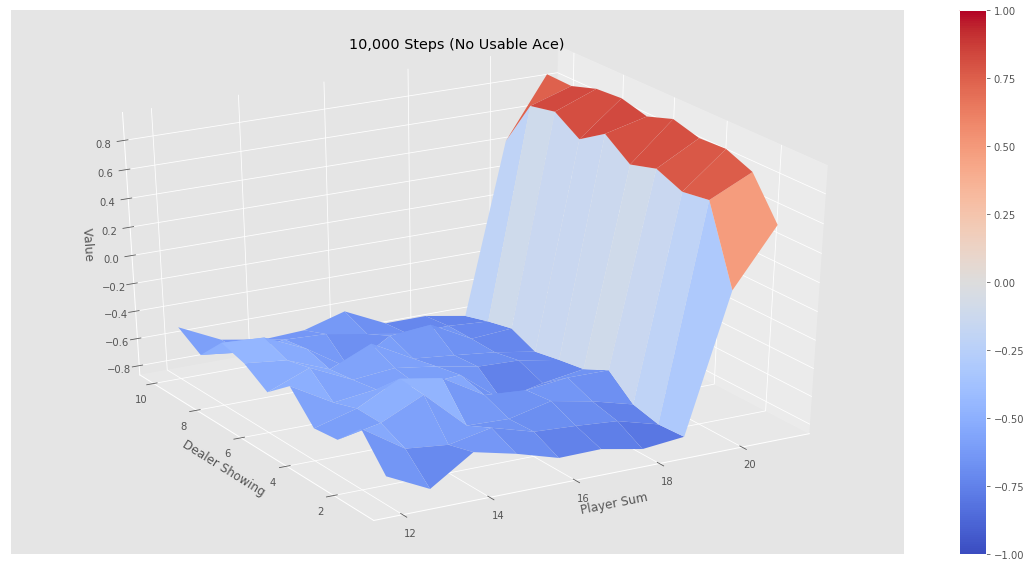

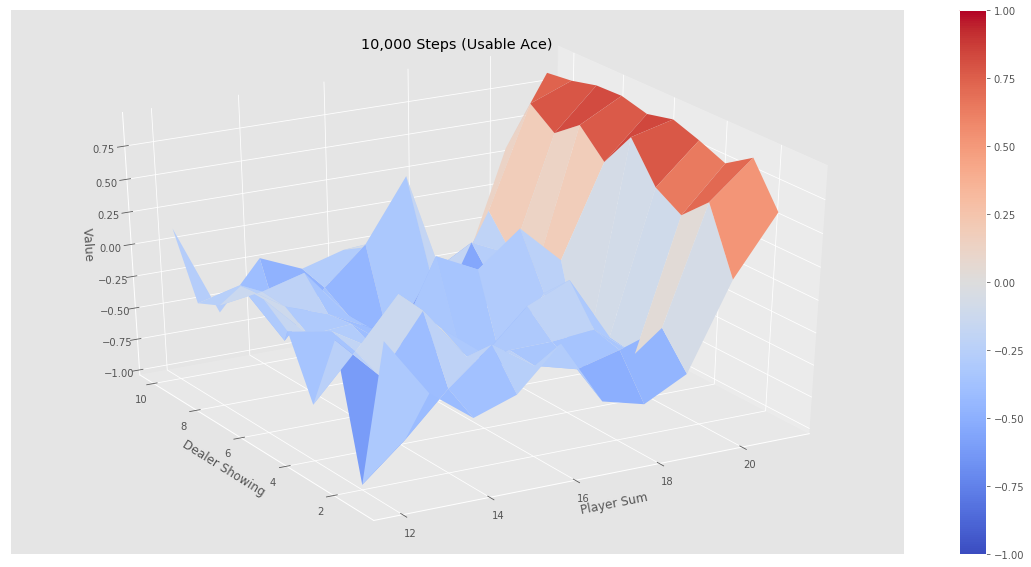

In [5]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

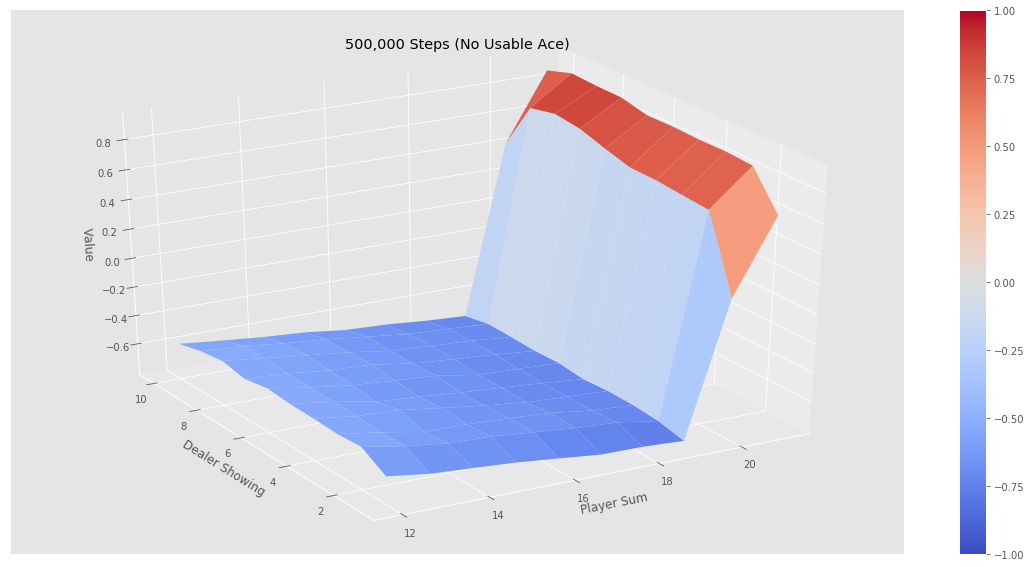

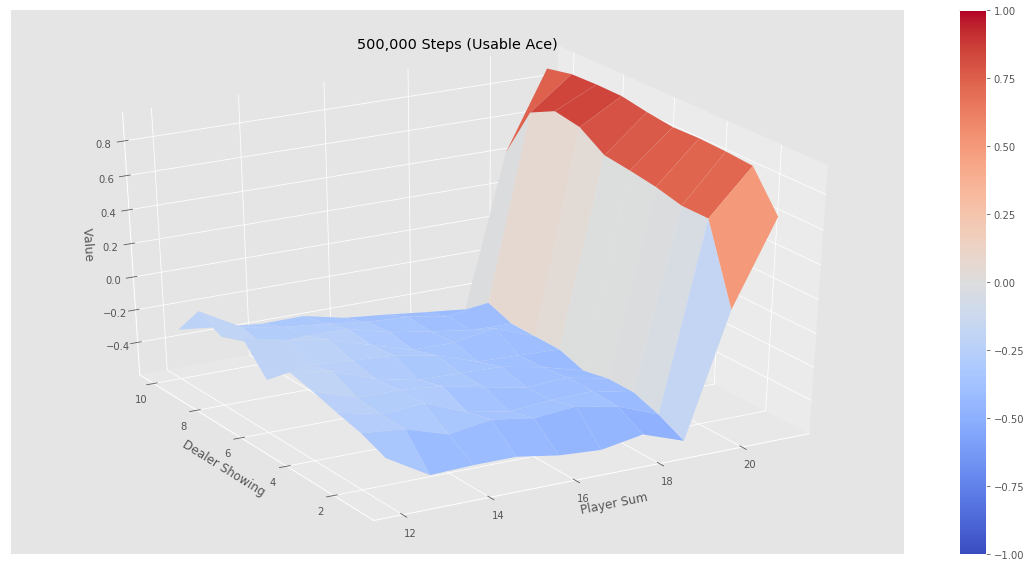

In [18]:
V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")